## Visualization for feature and objective space 

In [62]:
import sys
sys.path.append('..')

import pygmo as pg
import plotly.express as px
from src.generator import SamplesGenerator

### The problem of instantiation and sampling

In [84]:
# DIM = 4
# ID = 4
# OBJ = 3

DIM = 2
ID = 4
OBJ = 2

START_POINTS = 5000

# --- Problem
udp = pg.wfg(prob_id=ID, dim_dvs=DIM, dim_obj=OBJ, dim_k=OBJ-1)
# udp = pg.zdt(prob_id=ID, param=DIM)
pro = pg.problem(udp)

X, y = SamplesGenerator(pro).random_sample(n=START_POINTS)

### Feature space
The graph below shows a uniform distribution of points from the input space

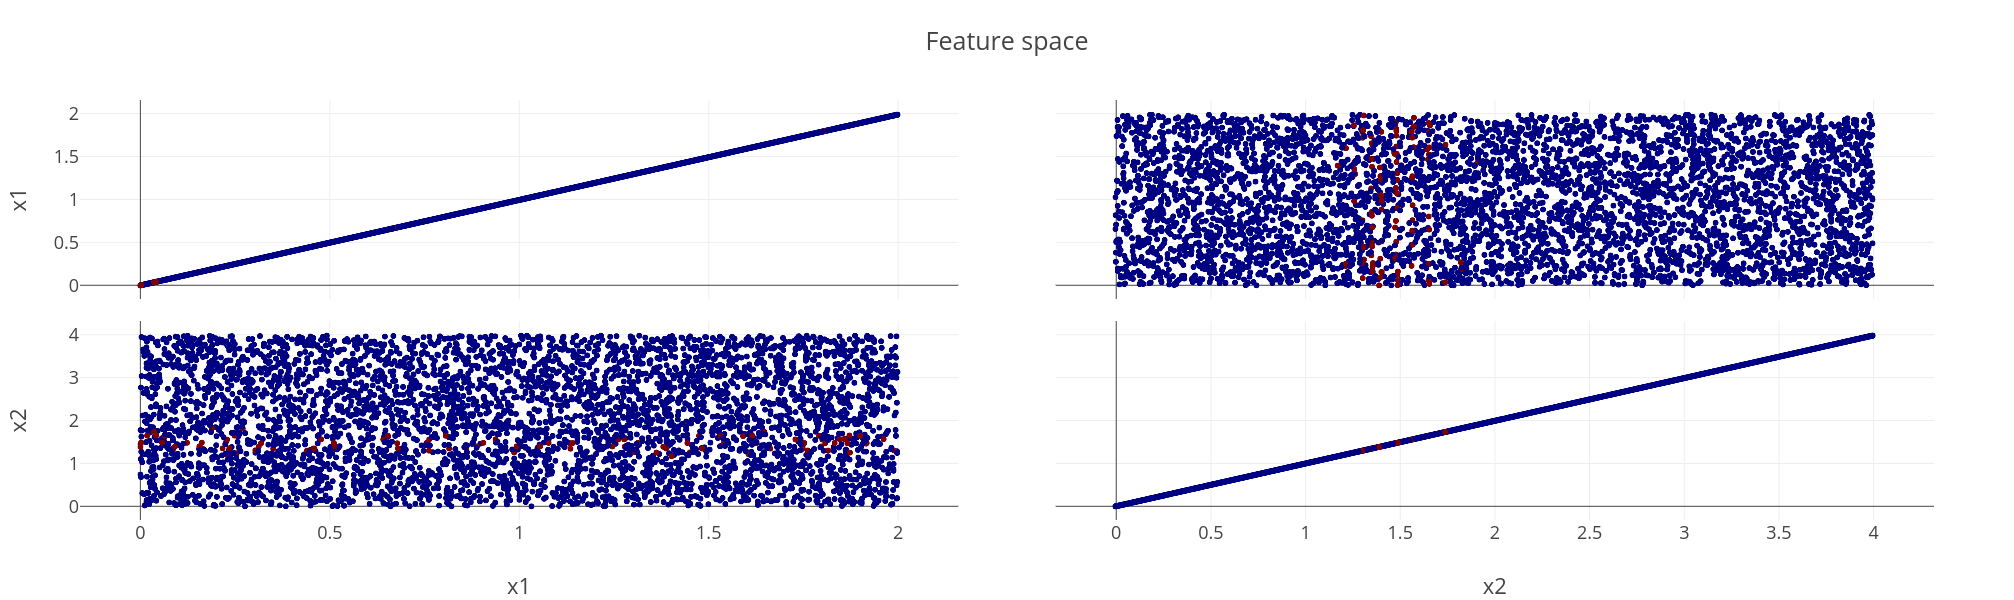

In [85]:
ndf, dl, dc, ndr = pg.fast_non_dominated_sorting(y.values)
X_ndf = X.copy()
X_ndf['ndf'] = 0
X_ndf.loc[ndf[0],['ndf']] = 1
px.scatter_matrix(X_ndf, template="presentation" , dimensions=list(X.columns), color='ndf', color_continuous_scale='Jet', title="Feature space").update_layout(coloraxis_showscale=False)

The following graph shows the object space. By default, all criteria must be minimized but they are contradictory. The solution is not one point but a certain set of them, called the Pareto front. All points on the Pareto front  are non-dominant, and they are closer to the lower left corner. Achieved a situation where you can not improve no criterion and does not worsen another. 

> The task is to find such parameters that reach a balance with all the objectives. That is to find a Pareto front for all objective space. Such points are highlighted on the plots.

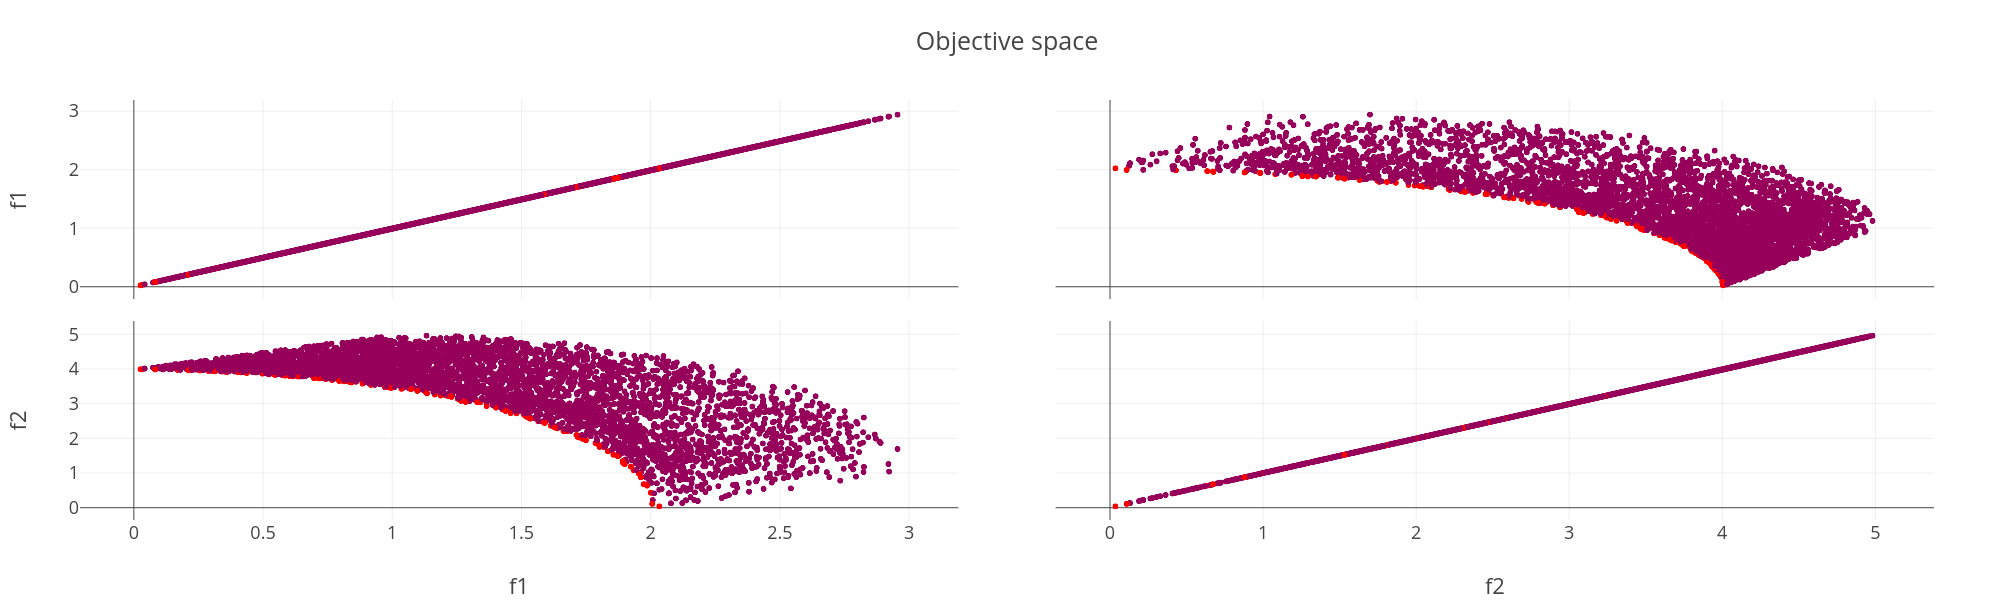

In [86]:
# ndf, dl, dc, ndr = pg.fast_non_dominated_sorting(y.values)
y_ndf = y.copy()
y_ndf['ndf'] = 0
y_ndf.loc[ndf[0],['ndf']] = 1
px.scatter_matrix(y_ndf, template="presentation", dimensions=list(y.columns), color='ndf', color_continuous_scale='Rainbow', title="Objective space").update_layout(coloraxis_showscale=False)

In [87]:
ndf_in_total = 100*(len(ndf[0])/len(X))

print("In total evaluated {} point(s). Non-dominated solutions is {:.1f}% from all dataset".format(len(X), ndf_in_total))
print("Hypervolume: {}".format(pg.hypervolume(-y.loc[ndf[0],:].values).compute([0]*OBJ)))

In total evaluated 5000 point(s). Non-dominated solutions is 2.1% from all dataset
Hypervolume: 6.305286212204565
